In [1]:
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib.patches import Circle, ConnectionPatch, FancyArrowPatch
import numpy as np
import time

In [2]:
Graph = nx.nx_agraph.read_dot('./Dataset/noname.dot/noname.dot') #Small Directed Network 
Graph1 = nx.nx_agraph.read_dot('./Dataset/LeagueNetwork.dot/LeagueNetwork.dot') #pro league 

edge_list = []
for e in Graph.edges():
    u,v = e
    edge_list.append((int(u),int(v)))

G = nx.DiGraph()
G.add_edges_from(edge_list)

edge_list_pro = []
for e in Graph1.edges():
    u,v = e
    edge_list_pro.append((int(u),int(v)))

G1 = nx.DiGraph() 
G1.add_edges_from(edge_list_pro)

node_list = [] 
for node in G.nodes():
    node_list.append(node)

node_list_pro = [] 
for node in G1.nodes():
    node_list_pro.append(node)    
    
print(f'In Small Network the number of edges is {len(edge_list)}, the number of nodes is {len(node_list)}\n')
print(f'In Pro League Network the number of edges is {len(edge_list_pro)}, the number of nodes is {len(node_list_pro)}')

In Small Network the number of edges is 27, the number of nodes is 24

In Pro League Network the number of edges is 239, the number of nodes is 16


In [3]:
adjacency_list = dict()
for edge in edge_list:
    source, target = edge
    if source not in adjacency_list:
        adjacency_list[source] = []
    adjacency_list[source].append(target)
print(adjacency_list)

{5: [13], 13: [3], 3: [15], 6: [14], 14: [21], 15: [7], 7: [18], 11: [8, 9], 9: [1], 16: [10, 2], 4: [9], 2: [17], 18: [3], 17: [3, 16], 19: [20], 20: [6, 12], 12: [8], 21: [11, 19], 22: [3], 1: [23], 23: [12], 24: [16]}


In [4]:
in_degree_list = {int(node): G.in_degree(node) for node in G.nodes()}
print(f'the In degree list is\n {in_degree_list}\n')

out_degree_list = {int(node): G.out_degree(node) for node in G.nodes()}
print(f'the Out degree list is:\n {out_degree_list}')

the In degree list is
 {5: 0, 13: 1, 3: 4, 15: 1, 6: 1, 14: 1, 21: 1, 7: 1, 18: 1, 11: 1, 8: 2, 9: 2, 1: 1, 16: 2, 10: 1, 2: 1, 4: 0, 17: 1, 19: 1, 20: 1, 12: 2, 22: 0, 23: 1, 24: 0}

the Out degree list is:
 {5: 1, 13: 1, 3: 1, 15: 1, 6: 1, 14: 1, 21: 2, 7: 1, 18: 1, 11: 2, 8: 0, 9: 1, 1: 1, 16: 2, 10: 0, 2: 1, 4: 1, 17: 2, 19: 1, 20: 2, 12: 1, 22: 1, 23: 1, 24: 1}


In [5]:
#a dictionary where keys are in-degrees/out-degree  and values are lists of nodes with that in-degree
inverted_in_degree_list = {}
for node, degree in in_degree_list.items():
    inverted_in_degree_list.setdefault(degree, []).append(node)

print(f' a dictionary of in-degree of nodes:\n {inverted_in_degree_list}\n')

inverted_out_degree_list = {}
for node, degree in out_degree_list.items():
    inverted_out_degree_list.setdefault(degree, []).append(node)

print(f' a dictionary of out-degree of nodes: \n {inverted_out_degree_list}')

 a dictionary of in-degree of nodes:
 {0: [5, 4, 22, 24], 1: [13, 15, 6, 14, 21, 7, 18, 11, 1, 10, 2, 17, 19, 20, 23], 4: [3], 2: [8, 9, 16, 12]}

 a dictionary of out-degree of nodes: 
 {1: [5, 13, 3, 15, 6, 14, 7, 18, 9, 1, 2, 4, 19, 12, 22, 23, 24], 2: [21, 11, 16, 17, 20], 0: [8, 10]}


In [6]:
def feedback_arc_set(G):
    G_copy = G.copy()
    fas = set()

    while True:
        try:
            cycle = nx.find_cycle(G_copy, orientation='original') # Find a cycle
        except nx.NetworkXNoCycle:   # If no more cycles
            break

        # how many cycles
        cycle_edge_counts = {}
        for edge in cycle:
            u, v, _ = edge  
            G_copy.remove_edge(u, v)
            cycle_count = sum(1 for _ in nx.simple_cycles(G_copy))
            cycle_edge_counts[(u, v)] = cycle_count
            G_copy.add_edge(u, v)

        edge_to_remove = max(cycle_edge_counts, key=cycle_edge_counts.get)
        G_copy.remove_edge(*edge_to_remove)
        fas.add(edge_to_remove)

    return fas

def rev_feedback_arc_set(G, fas):
    rev_fas= set()
    for edge in fas:
        u,v = edge
        rev_fas.add((v,u))
    return rev_fas

def original_graph_without_cycles(G, fas):
    G1 = G.copy()
    for edge in feedback_arc_set(G):
        u,v = edge
        G1.remove_edge(u,v)
    return G1

def dag_graph(G, fas):
    G_a = G.copy()
    G1 =original_graph_without_cycles(G_a, fas)
    for edge in rev_feedback_arc_set(G, fas):
        u,v = edge
        G1.add_edge(u,v)
    return G1

In [7]:
fas = feedback_arc_set(G)
print("Feedback arc set, Small Directed Network:", fas)
rev_fas = rev_feedback_arc_set(G, fas)
print("Reverse feedback arc set, Small Directed Network :", rev_fas)

G2 = dag_graph(G, fas)
original_edges = list()
for edge in original_graph_without_cycles(G, fas).edges():
    u,v =edge
    original_edges.append((u,v))
reversed_edges = list(rev_feedback_arc_set(G, fas))

Feedback arc set, Small Directed Network: {(16, 2), (6, 14), (3, 15)}
Reverse feedback arc set, Small Directed Network : {(14, 6), (2, 16), (15, 3)}


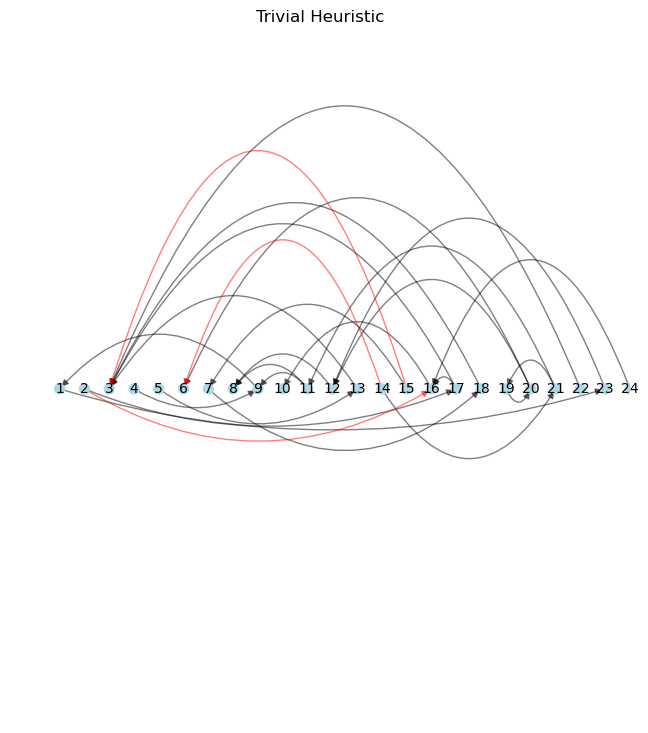

In [8]:
def draw_curved_arrow(ax, A, B, color='black', rad=0.2):
    # choose a "radius" for the arc
    control_point = [(A[0]+B[0])/2, (A[1]+B[1])/2 + rad]
    arrow = FancyArrowPatch(A, B, connectionstyle=f"arc3,rad={rad}",
                            color=color, arrowstyle='-|>',
                            mutation_scale=10.0,
                            lw=1, alpha=0.5)
    ax.add_patch(arrow)



pos = {node: (node, 0) for node in G.nodes()}  # Positions for all nodes in a line

fig, ax = plt.subplots(figsize=(8, 9))

for node in G.nodes():
    circle = Circle(pos[node], 0.2, fill=True, color='lightblue', zorder=2)
    ax.add_patch(circle)
    plt.text(pos[node][0], pos[node][1], str(node), fontsize=10, ha='center', va='center', zorder=3)

for edge in original_edges:
    draw_curved_arrow(ax, pos[edge[0]], pos[edge[1]], rad=0.1 + 0.05 * edge[0])

    
for edge in reversed_edges:
    draw_curved_arrow(ax, pos[edge[0]], pos[edge[1]], rad=0.1 + 0.1 * edge[0], color='red')
plt.title('Trivial Heuristic')
plt.axis('equal')
plt.axis('off')
plt.ylim(0,1)
plt.xlim(-1, len(G.nodes()))  # Set limits to include all nodes and edges
plt.show()


Feedback arc set based on order, Small Network: {(21, 19), (16, 2), (18, 3)}
Reverse feedback arc set: {(3, 18), (2, 16), (19, 21)}


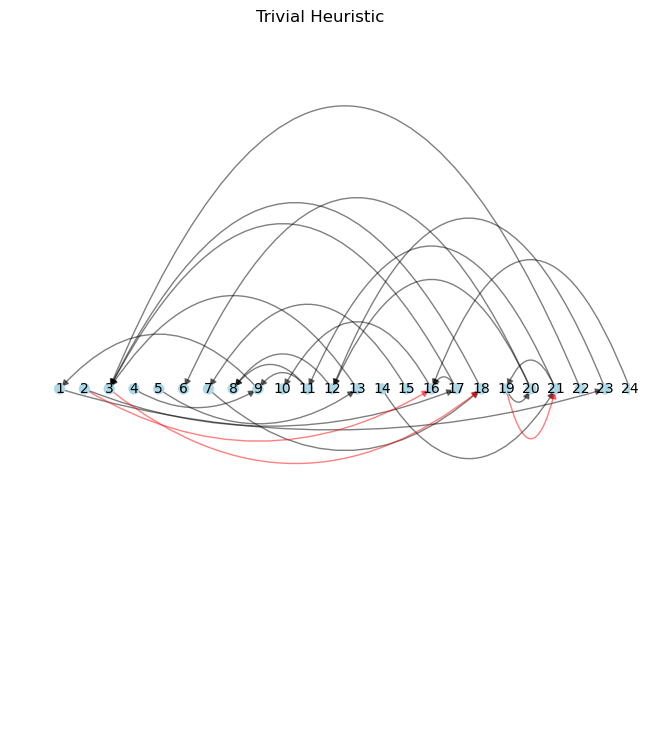

In [9]:
def feedback_arc_set_ordered(G, node_order):
    backward_edges = [(u, v) for u, v in G.edges() if node_order.index(u) > node_order.index(v)]
    fas = set()
    G_copy = G.copy()

    # Only consider cycles include a backward edge
    cycles_with_backward_edges = [cycle for cycle in nx.simple_cycles(G_copy) if any(edge in backward_edges for edge in zip(cycle, cycle[1:] + cycle[:1]))]

    for cycle in cycles_with_backward_edges:
        for edge in zip(cycle, cycle[1:] + cycle[:1]):
            if edge in backward_edges:
                fas.add(edge)
                G_copy.remove_edge(*edge)  
                break 

    assert nx.is_directed_acyclic_graph(G_copy), "The resulting graph is not acyclic."
    
    return fas


node_order = [i for i in range(1,len(node_list)+1)]  # order of nodes
fas = feedback_arc_set_ordered(G, node_order)
print("Feedback arc set based on order, Small Network:", fas)

rev_fas = rev_feedback_arc_set(G, fas)
print("Reverse feedback arc set:", rev_fas)

G2 = dag_graph(G, fas)

original_edges = list()
for edge in original_graph_without_cycles(G, fas).edges():
    u,v =edge
    original_edges.append((u,v))
reversed_edges = list(rev_feedback_arc_set(G, fas))

fig, ax = plt.subplots(figsize=(8, 9))

for node in G.nodes():
    circle = Circle(pos[node], 0.2, fill=True, color='lightblue', zorder=2)
    ax.add_patch(circle)
    plt.text(pos[node][0], pos[node][1], str(node), fontsize=10, ha='center', va='center', zorder=3)
    
for edge in original_edges:
    draw_curved_arrow(ax, pos[edge[0]], pos[edge[1]], rad=0.1 + 0.05 * edge[0])

    
for edge in reversed_edges:
    draw_curved_arrow(ax, pos[edge[0]], pos[edge[1]], rad=0.1 + 0.1 * edge[0], color='red')

plt.title('Trivial Heuristic')
plt.axis('equal')
plt.axis('off')
plt.ylim(0, 1)
plt.xlim(-1, len(G.nodes()))   
plt.show()

In [10]:
def N_outgoing(v, G):
    return {(v, u) for u in G.successors(v)}

def N_incoming(v, G):
    return {(u, v) for u in G.predecessors(v)}

def N(v, G):
    return N_outgoing(v, G).union(N_incoming(v, G))

In [11]:
def heuristic_with_guarantees(G):
    A_prime = set()
    
    G_copy = G.copy()

    while len(G_copy.nodes) > 0:
        sinks = [v for v in G_copy.nodes if G_copy.in_degree(v) > 0 and G_copy.out_degree(v) == 0]
        for v in sinks:
            A_prime.update(N_incoming(v, G_copy))
            G_copy.remove_node(v)

        isolated_nodes = list(nx.isolates(G_copy))
        G_copy.remove_nodes_from(isolated_nodes)
        
        sources = [v for v in G_copy.nodes if G_copy.out_degree(v) > 0 and G_copy.in_degree(v) == 0]
        for v in sources:
            A_prime.update(N_outgoing(v, G_copy))
            G_copy.remove_node(v)

        # If graph is non-empty, select a node with max |N_outgoing| - |N_incoming|
        if len(G_copy.nodes) > 0:
            v = max(G_copy.nodes, key=lambda v: len(N_outgoing(v, G_copy)) - len(N_incoming(v, G_copy)))
            A_prime.update(N_outgoing(v, G_copy))
            # remove the neighbors from the graph as well
            G_copy.remove_nodes_from(N_outgoing(v, G_copy))
            G_copy.remove_node(v)

    return A_prime

In [12]:
A_prime = heuristic_with_guarantees(G)
A_minus_A_prime = set(G.edges()) - A_prime
print("Edges in the acyclic subgraph, Small Directed Network:\n", A_prime)
print("A_minus_A_prime, Small Directed Network:", A_minus_A_prime)

Edges in the acyclic subgraph, Small Directed Network:
 {(4, 9), (21, 19), (19, 20), (24, 16), (17, 3), (15, 7), (5, 13), (1, 23), (20, 6), (20, 12), (22, 3), (21, 11), (12, 8), (11, 8), (7, 18), (16, 10), (17, 16), (6, 14), (11, 9), (13, 3), (16, 2), (23, 12), (9, 1), (3, 15)}
A_minus_A_prime, Small Directed Network: {(2, 17), (14, 21), (18, 3)}


In [13]:
A_prime = heuristic_with_guarantees(G1)
A_minus_A_prime = set(G1.edges()) - A_prime
print("Edges in the acyclic subgraph, Pro League Network:\n", len(A_prime))
print("A_minus_A_prime, Pro League Network:", len(A_minus_A_prime))

Edges in the acyclic subgraph, Pro League Network:
 120
A_minus_A_prime, Pro League Network: 119


In [14]:
# checking that our "Pro League" netwok is 2-cycles ?
import networkx as nx

def has_2_cycles(G):
    for edge in G.edges():
        if G.has_edge(edge[1], edge[0]):
            return True  
    return False  

if has_2_cycles(G1):
    print("The graph has 2-cycles.")
else:
    print("The graph does not have 2-cycles.")


The graph has 2-cycles.


# Height Optimization

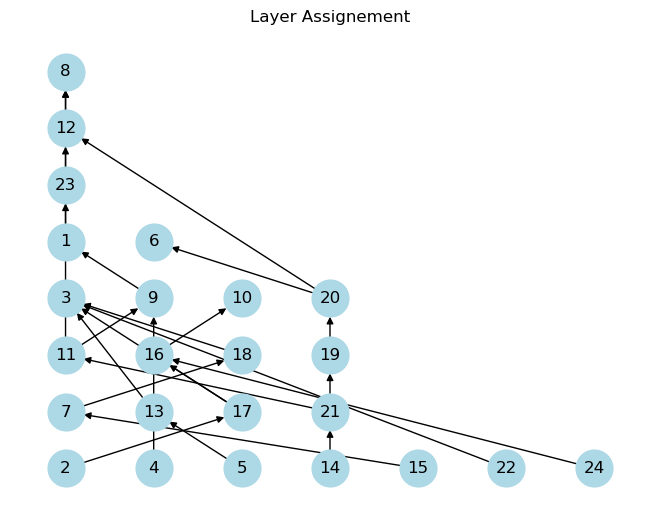

In [15]:
def original_graph_without_cycles(G, fas):
    G1 = G.copy()
    for edge in feedback_arc_set(G):
        u,v = edge
        G1.remove_edge(u,v)
    return G1

def layer_assignment(G):
    layers = {}
    i = 0
    G_copy = G.copy()
    removed_edges = set()
    
    while True:
        S = {v for v, d in G_copy.in_degree() if d == 0}
        if not S:
            remaining_nodes = set(G_copy.nodes())
            if not remaining_nodes:
                break  
            # Find node with the highest in-degree
            new_source = max(remaining_nodes, key=lambda x: G_copy.in_degree(x))
            S = {new_source}
        
        layers[i] = S
        G_copy.remove_nodes_from(S)
        i += 1

    return layers, removed_edges

def draw_layered_graph(G, layers):
    pos = {}
    for layer, nodes in layers.items():
        for i, node in enumerate(sorted(nodes)):
            pos[node] = (i, -layer)

    nx.draw(G, pos, with_labels=True, node_size=700, node_color='lightblue', arrows=True)
    plt.gca().invert_yaxis()


node_order = [i for i in range(1,len(node_list)+1)] 
fas = feedback_arc_set_ordered(G, node_order)

G_dag = original_graph_without_cycles(G, fas)

layers, removed_edges = layer_assignment(G_dag)

draw_layered_graph(G_dag, layers)
# reversed_edges = list(rev_feedback_arc_set(G, fas))
plt.title('Layer Assignement')
plt.show()


C:\Users\masou\AppData\Local\Temp\ipykernel_11732\82671838.py:47: DeprecationWarning: `alltrue` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `all` instead.
  nx.draw_networkx_edges(G, pos, edgelist=fas, edge_color='red')


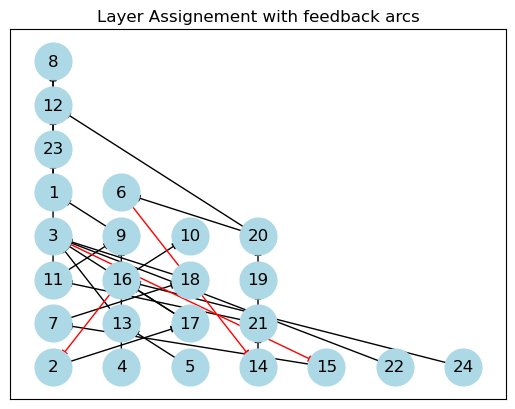

set()


In [16]:
def layer_assignment(G):
    layers = {}
    i = 0
    G_copy = G.copy()
    node_layers = {}  # Track the layer of each node
    back_edges = set()  # Set of edges that go "backwards" in terms of layers
    
    while G_copy:
        # Nodes with no incoming edges
        S = {v for v, d in G_copy.in_degree() if d == 0}
        
        # If no such nodes, force pick a node (breaks a potential cycle)
        if not S:
            new_source = max(G_copy.nodes, key=lambda x: G_copy.in_degree(x))
            S = {new_source}
        
        # Assign layer to nodes and remove them from the graph copy
        for node in S:
            node_layers[node] = i
            G_copy.remove_node(node)
        
        layers[i] = S
        i += 1
    
    # Now identify back edges based on node_layers
    for u, v in G.edges():
        if node_layers.get(u, 0) >= node_layers.get(v, 0):  # Edge going to same or higher layer
            back_edges.add((u, v))

    return layers, back_edges


def draw_graph_with_layers(G, layers, back_edges, fas):
    pos = {}
    # Assign positions to nodes based on their layer
    for layer, nodes in layers.items():
        for i, node in enumerate(sorted(nodes)):
            pos[node] = (i, -layer)  # Layer as y-coordinate, index as x-coordinate

    # Draw the normal edges in black
    nx.draw_networkx_edges(G, pos, edgelist=set(G.edges()) - back_edges, edge_color='black')
    
    # Draw the back edges in red
    nx.draw_networkx_edges(G, pos, edgelist=back_edges, edge_color='red')
    
    # Draw the back edges in red
    nx.draw_networkx_edges(G, pos, edgelist=fas, edge_color='red')

    # Draw the nodes
    nx.draw_networkx_nodes(G, pos, node_color='lightblue', node_size=700)

    # Draw the node labels
    nx.draw_networkx_labels(G, pos)

    # Reverse the y-axis to have layer 0 at the top
    plt.gca().invert_yaxis()
    plt.title('Layer Assignement with feedback arcs')
    plt.show()


# Use the function and draw the graph
layers, back_edges = layer_assignment(G_dag)
fas = feedback_arc_set(G)

draw_graph_with_layers(G_dag, layers, back_edges, fas)
print(back_edges)

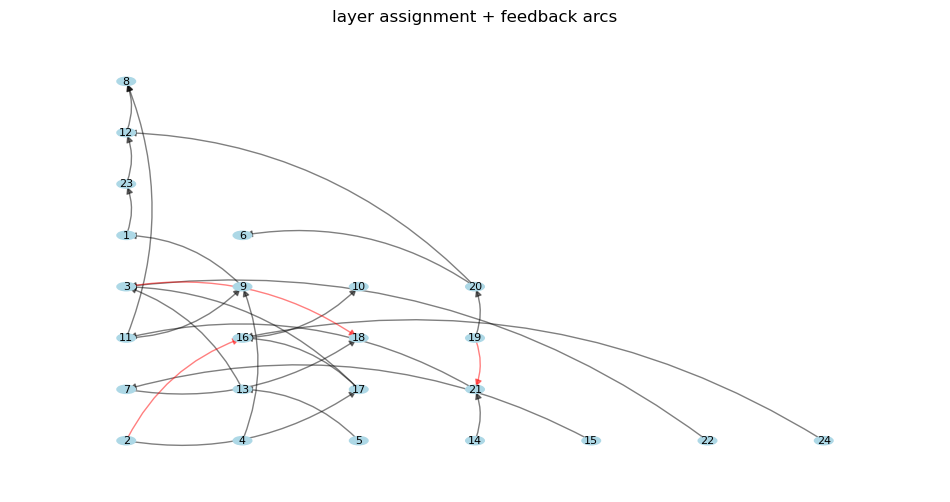

In [17]:
def draw_layered_graph_n(G, layers, fas, ax):
    pos = {}
    for layer, nodes in layers.items():
        for i, node in enumerate(sorted(nodes)):
            pos[node] = (i, layer)

    for node, (x, y) in pos.items():
        circle = plt.Circle((x, y), 0.08, color='lightblue', zorder=2)
        ax.add_patch(circle)
        ax.text(x, y, str(node), fontsize=8, ha='center', va='center', zorder=3)

    for edge in G.edges():
        if edge not in fas:
            draw_curved_arrow(ax, pos[edge[0]], pos[edge[1]], color='black')

    for edge in fas:
        draw_curved_arrow(ax, pos[edge[1]], pos[edge[0]], color='red', rad=-0.2)

    ax.set_xlim(-1, max(len(layer) for layer in layers.values()))
    ax.set_ylim(-1, len(layers))
    ax.axis('off')
    

node_order = [i for i in range(1,len(node_list)+1)] 
fas = feedback_arc_set_ordered(G, node_order)

G_dag = original_graph_without_cycles(G, fas)
layers, _ = layer_assignment(G_dag)

fig, ax = plt.subplots(figsize=(12, 6))

draw_layered_graph_n(G_dag, layers, fas, ax)
plt.title('layer assignment + feedback arcs')
plt.show()

# Crossing Minimization

In [18]:
def calculate_barycenter(v, layer_order, G):
    neighbors = N_incoming(v, G) | N_outgoing(v, G)
    valid_neighbors = {u for u, _ in neighbors if u in layer_order}
    if not valid_neighbors:
        return 0  
    barycenter = sum(layer_order[u] for u in valid_neighbors) / len(valid_neighbors)
    return barycenter

def introduce_tiny_gaps(barycenters):
    sorted_nodes = sorted(barycenters.items(), key=lambda x: x[1])
    for i, (v, barycenter) in enumerate(sorted_nodes):
        if i > 0 and barycenter == sorted_nodes[i - 1][1]:
            sorted_nodes[i] = (v, barycenter + 0.001 * i)  
    return dict(sorted_nodes)

def barycenter_heuristic(G, layers):
        final_ordering = {i: {} for i in layers.keys()}
        final_ordering[0] = {node: i for i, node in enumerate(layers[0])}
    
        for layer in range(1, max(layers.keys()) + 1):
            barycenters = {}
            for v in layers[layer]:
                barycenters[v] = calculate_barycenter(v, final_ordering[layer - 1], G)
            barycenters_with_gaps = introduce_tiny_gaps(barycenters)
            sorted_nodes_by_barycenter = sorted(barycenters_with_gaps.items(), key=lambda x: x[1])
            final_ordering[layer] = {node: i for i, (node, _) in enumerate(sorted_nodes_by_barycenter)}
    
        return final_ordering    

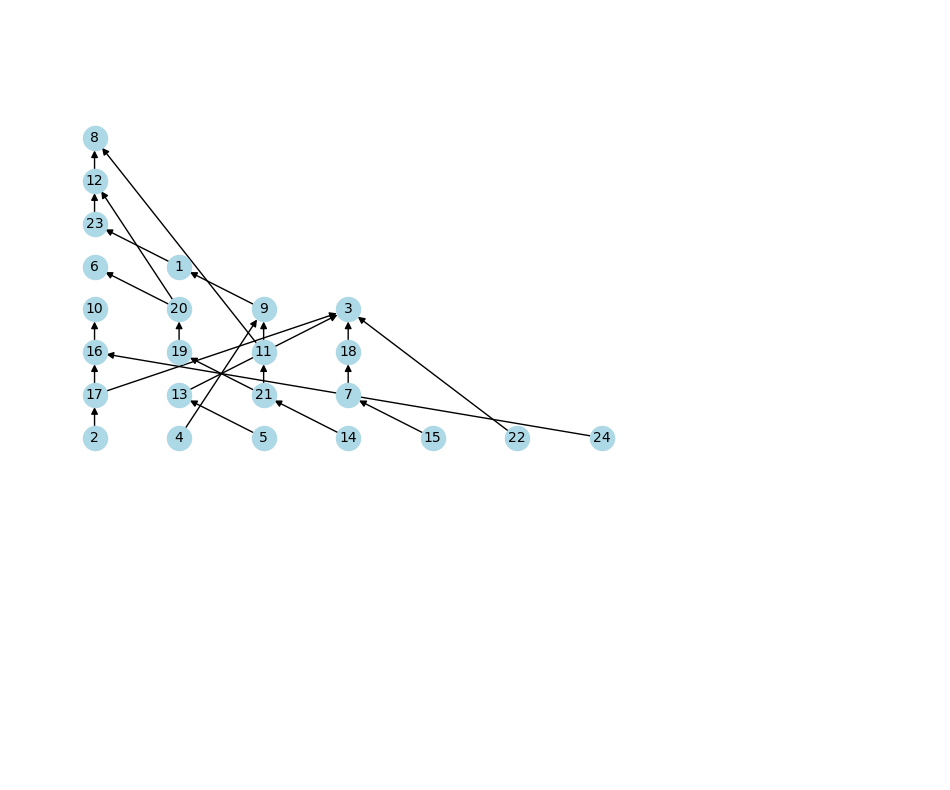

In [19]:
def draw_layered_graph_with_straight_edges(G, layers, final_ordering, fas):
    plt.figure(figsize=(12, 10))
    ax = plt.gca()
    pos = {}
    for layer, nodes in layers.items():
        for node in nodes:
            pos[node] = (final_ordering[layer][node], layer)

    nx.draw_networkx_nodes(G, pos, node_size=300, node_color='lightblue', ax=ax)

    nx.draw_networkx_labels(G, pos, font_size=10, ax=ax)

    nx.draw_networkx_edges(G, pos, ax=ax)
    
    nx.draw_networkx_edges(G, pos, edgelist=fas, edge_color='red')

    ax.set_xlim(-1, max(final_ordering[max(layers.keys())].values()) + 10)
    ax.set_ylim(-max(layers.keys()) - 1, 10)
    ax.axis('off')
    plt.show()

    
node_order = [i for i in range(1,len(node_list)+1)] 
fas = feedback_arc_set_ordered(G, node_order)

G_dag = original_graph_without_cycles(G, fas)
layers, _ = layer_assignment(G_dag)

assert all(node in G_dag.nodes for layer in layers.values() for node in layer), "Some nodes are missing in the layers"


final_ordering = barycenter_heuristic(G_dag, layers)
draw_layered_graph_with_straight_edges(G_dag, layers, final_ordering, {})

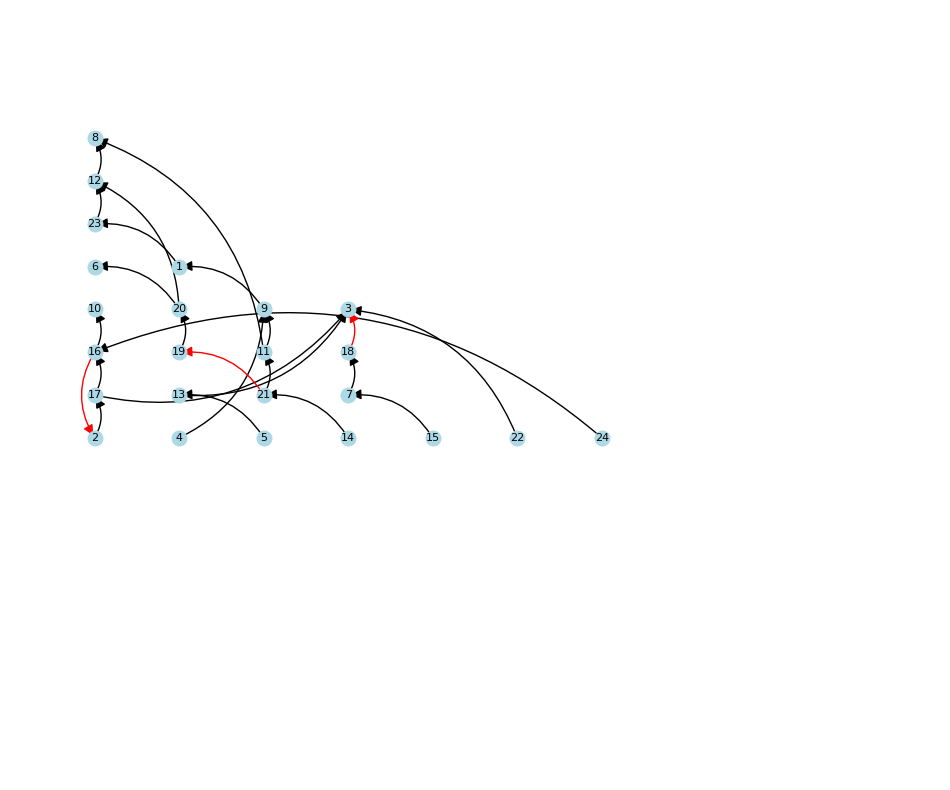

In [20]:
def draw_curved_arrow(ax, A, B, color='black', rad=0.2):
    # choose a "radius" for the arc
    control_point = [(A[0]+B[0])/2, (A[1]+B[1])/2 + rad]
    arrow = FancyArrowPatch(A, B, connectionstyle=f"arc3,rad={rad}",
                            color=color, arrowstyle='-|>',
                            mutation_scale=15.0, # increase the size of the arrowhead
                            lw=1, alpha=1)  # make the arrow opaque
    ax.add_patch(arrow)
    
def draw_layered_graph_with_curved_edges(G, layers, final_ordering, fas):
    plt.figure(figsize=(12, 10))
    ax = plt.gca()
    pos = {}
    for layer, nodes in layers.items():
        for node in nodes:
            pos[node] = (final_ordering[layer][node], layer)  # Inverted y-axis for layering

    nx.draw_networkx_nodes(G, pos, node_size=110, node_color='lightblue', ax=ax)
    nx.draw_networkx_labels(G, pos, font_size=8, ax=ax)

    # Draw non-FAS edges as straight lines
    normal_edges = [edge for edge in G.edges if edge not in fas]
    for edge in normal_edges:
        draw_curved_arrow(ax, pos[edge[0]], pos[edge[1]], color='black', rad=0.3)

    # Draw FAS edges as curved arrows
    for edge in fas:
        draw_curved_arrow(ax, pos[edge[0]], pos[edge[1]], color='red', rad=0.3)

    ax.set_xlim(-1, max(final_ordering[max(layers.keys())].values()) + 10)
    ax.set_ylim(-max(layers.keys()) - 1, 10)
    ax.axis('off')
    plt.show()

# Assuming you have defined feedback_arc_set_ordered, original_graph_without_cycles, etc.
node_order = [i for i in range(1, len(node_list)+1)]
fas = feedback_arc_set_ordered(G, node_order)

G_dag = original_graph_without_cycles(G, fas)
layers, _ = layer_assignment(G_dag)
final_ordering = barycenter_heuristic(G_dag, layers)
draw_layered_graph_with_curved_edges(G_dag, layers, final_ordering, fas)

In [ ]:
node_order_pro = [i for i in range(1, len(node_list_pro)+1)]
fas_pro = feedback_arc_set_ordered(G1, node_order_pro)
G_dag_pro = original_graph_without_cycles(G1, fas_pro)
layers_pro, _ = layer_assignment(G_dag_pro)
final_ordering_pro = barycenter_heuristic(G_dag_pro, layers_pro)
draw_layered_graph_with_curved_edges(G_dag_pro, layers_pro, final_ordering_pro, fas_pro)

# Median-Heuristic

In [ ]:
def calculate_median(v, layer_order, G):
    neighbors = N_incoming(v, G) | N_outgoing(v, G)
    valid_neighbors = [u for u, _ in neighbors if u in layer_order]
    if not valid_neighbors:
        return 0
    sorted_positions = sorted(layer_order[u] for u in valid_neighbors)
    median_position = sorted_positions[len(sorted_positions) // 2]
    return median_position

def median_heuristic(G, layers):
    final_ordering = {i: {} for i in layers.keys()}
    final_ordering[0] = {node: i for i, node in enumerate(layers[0])}

    for layer in range(1, max(layers.keys()) + 1):
        medians = {}
        for v in layers[layer]:
            medians[v] = calculate_median(v, final_ordering[layer - 1], G)
        medians_with_gaps = introduce_tiny_gaps(medians)  
        sorted_nodes_by_median = sorted(medians_with_gaps.items(), key=lambda x: x[1])
        final_ordering[layer] = {node: i for i, (node, _) in enumerate(sorted_nodes_by_median)}

    return final_ordering


node_order = [i for i in range(1,len(node_list)+1)] 
fas = feedback_arc_set_ordered(G, node_order)

G_dag = original_graph_without_cycles(G, fas)
layers, _ = layer_assignment(G_dag)

final_ordering = median_heuristic(G_dag, layers)
draw_layered_graph_with_straight_edges(G_dag, layers, final_ordering, {})
draw_layered_graph_with_curved_edges(G_dag, layers, final_ordering, {})

### Iterative cross minimizing by Barycenter and Median

In [ ]:
def iterate_layers_to_minimize_crossings(G, layers, num_iterations=10):
    final_ordering = barycenter_heuristic(G, layers)
    
    for iteration in range(num_iterations):
        for direction in ('up', 'down'):
            if direction == 'down':
                layer_range = range(1, max(layers.keys()) + 1)
            else:
                layer_range = range(max(layers.keys()) - 1, 0, -1)
            
            for layer in layer_range:
                adjacent_layer = layer - 1 if direction == 'down' else layer + 1
                barycenters = {
                    v: calculate_barycenter(v, final_ordering[adjacent_layer], G) 
                    for v in layers[layer]
                }
                barycenters_with_gaps = introduce_tiny_gaps(barycenters)
                sorted_nodes_by_barycenter = sorted(
                    barycenters_with_gaps.items(), key=lambda x: x[1]
                )
                final_ordering[layer] = {
                    node: i for i, (node, _) in enumerate(sorted_nodes_by_barycenter)
                }
                
    return final_ordering
final_ord = iterate_layers_to_minimize_crossings(G_dag, layers)
print(final_ord)


# node_order_pro = [i for i in range(1,len(node_list_pro_league)+1)] 
# fas_pro = feedback_arc_set_ordered(G1, node_order_pro)

# G_dag_pro = original_graph_without_cycles(G1, fas_pro)
# layers_pro = layer_assignment(G_dag_pro)

# final_ord_pro = iterate_layers_to_minimize_crossings(G_dag_pro, layers_pro)
# print(final_ord_pro)

Initial number of crossings: 27


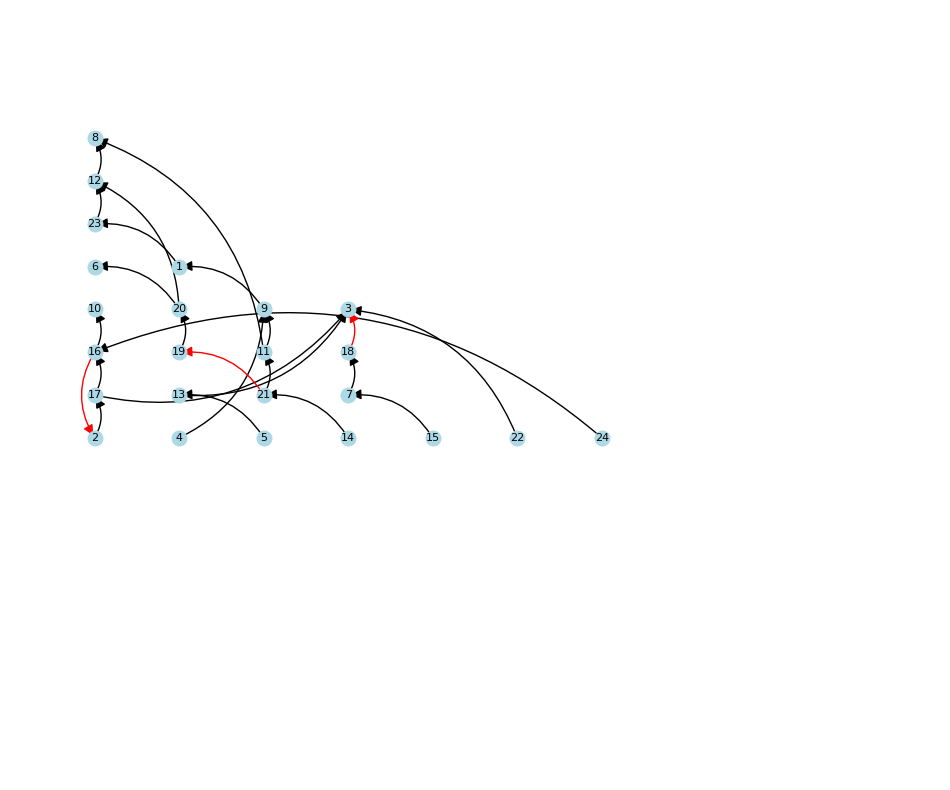

Iteration 1, Direction down: number of crossings: 27


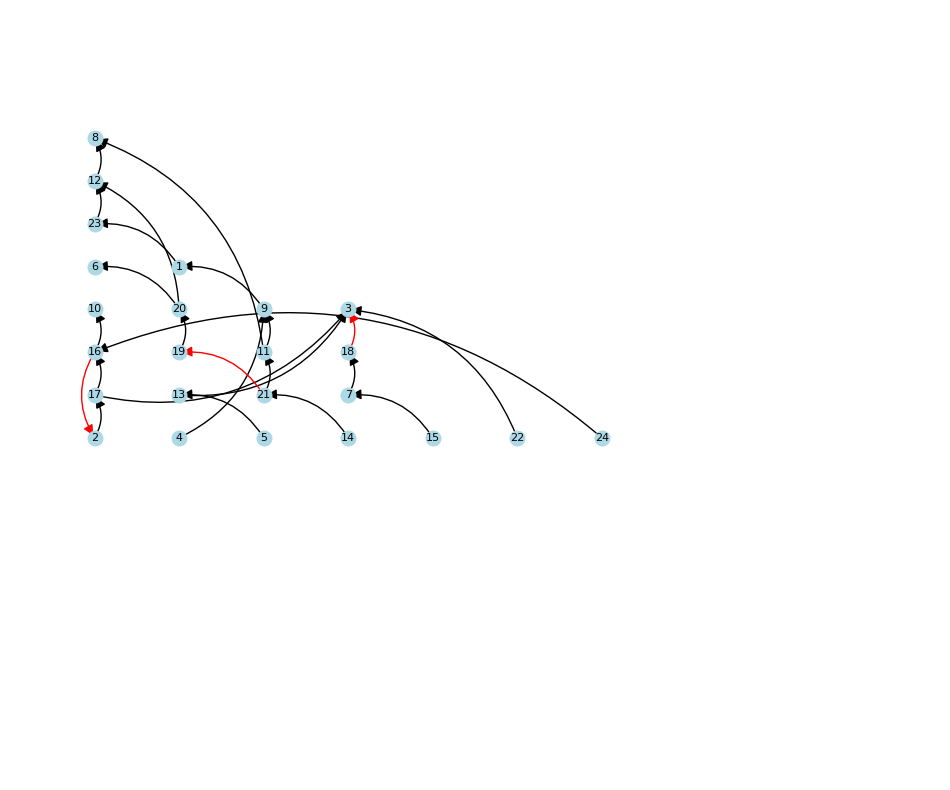

Iteration 1, Direction up: number of crossings: 38


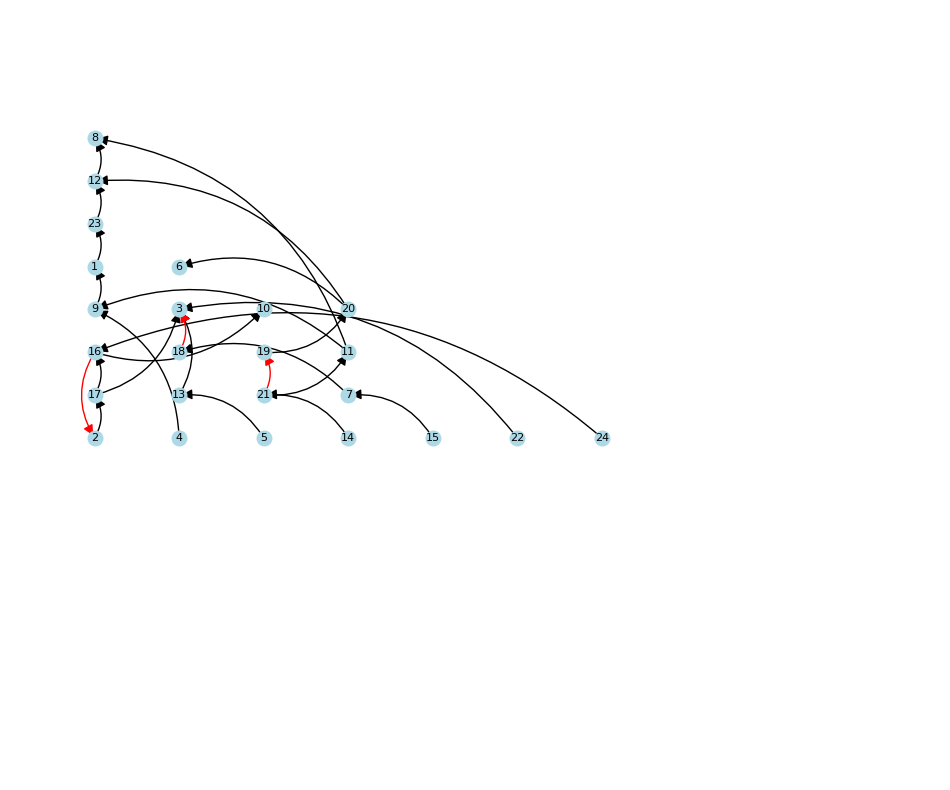

Iteration 2, Direction down: number of crossings: 27


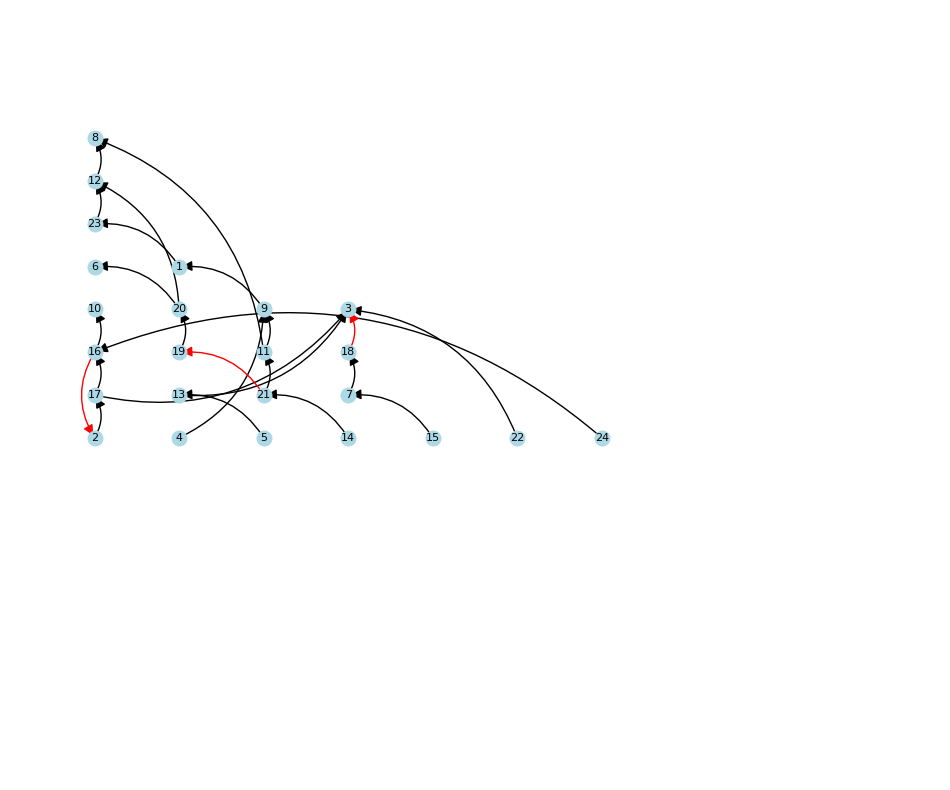

Iteration 2, Direction up: number of crossings: 38


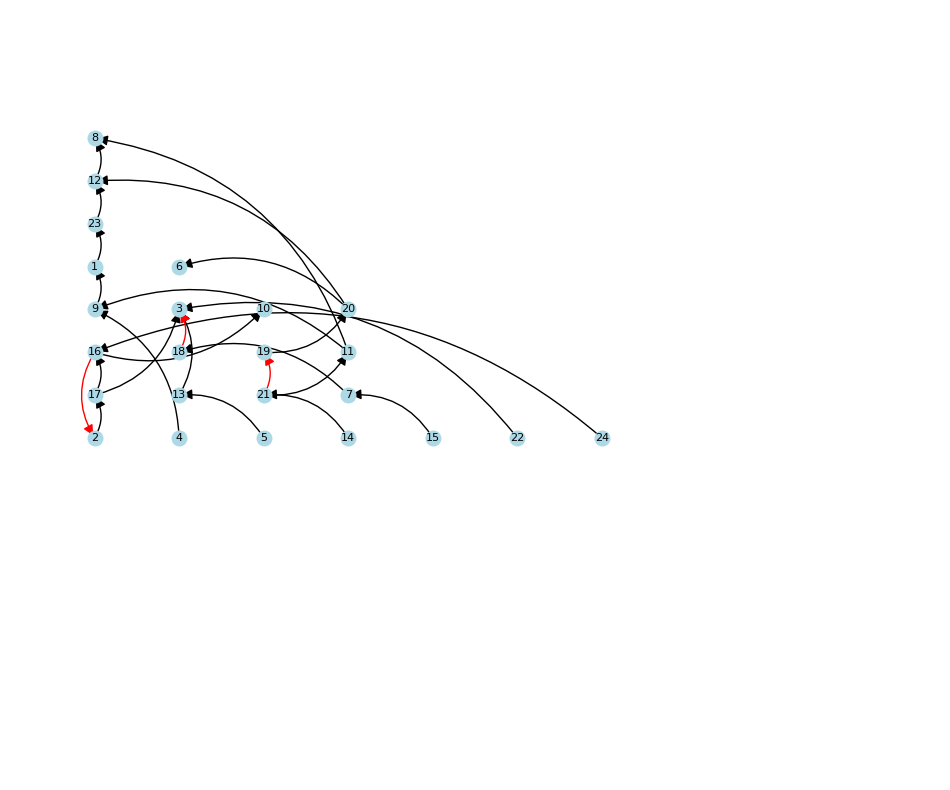

Iteration 3, Direction down: number of crossings: 27


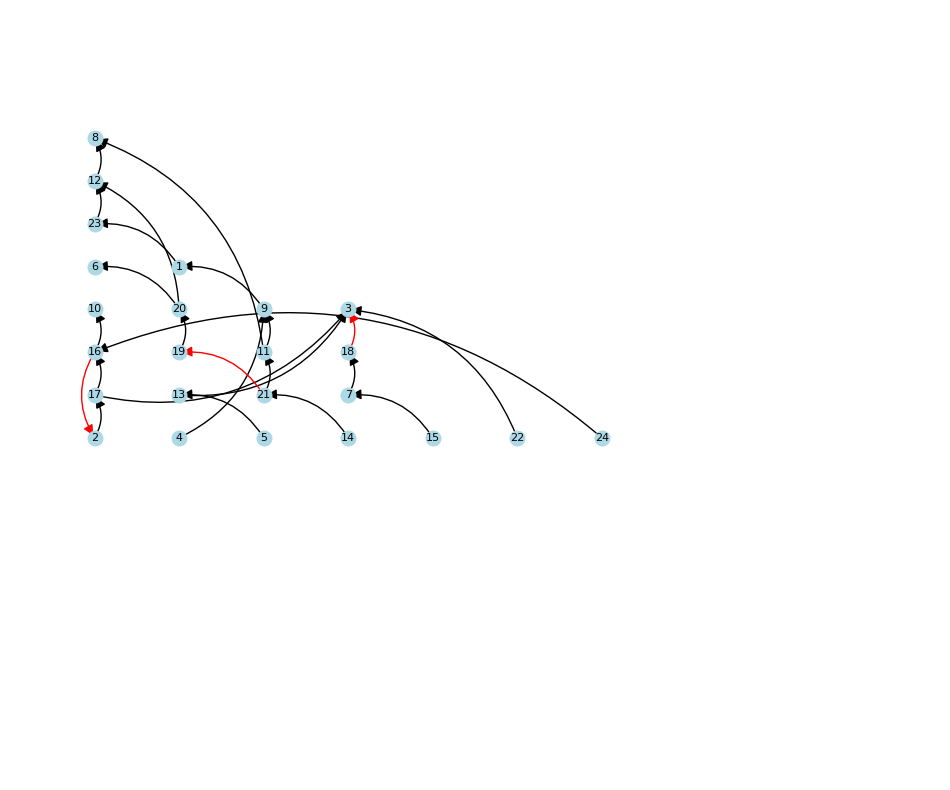

Iteration 3, Direction up: number of crossings: 38


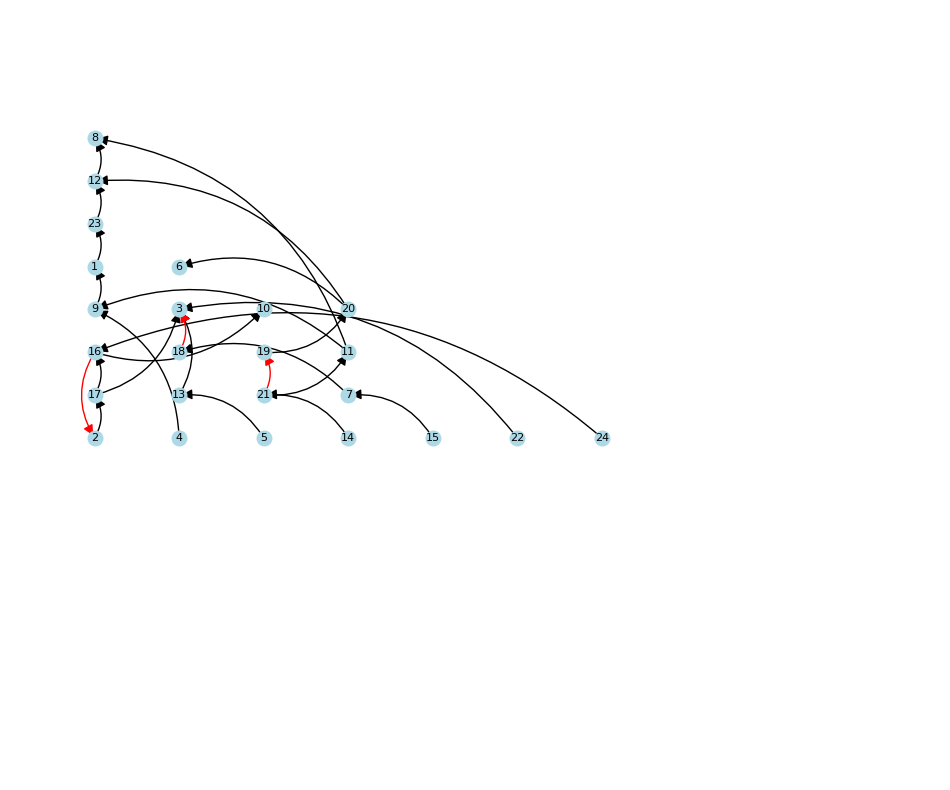

Iteration 4, Direction down: number of crossings: 27


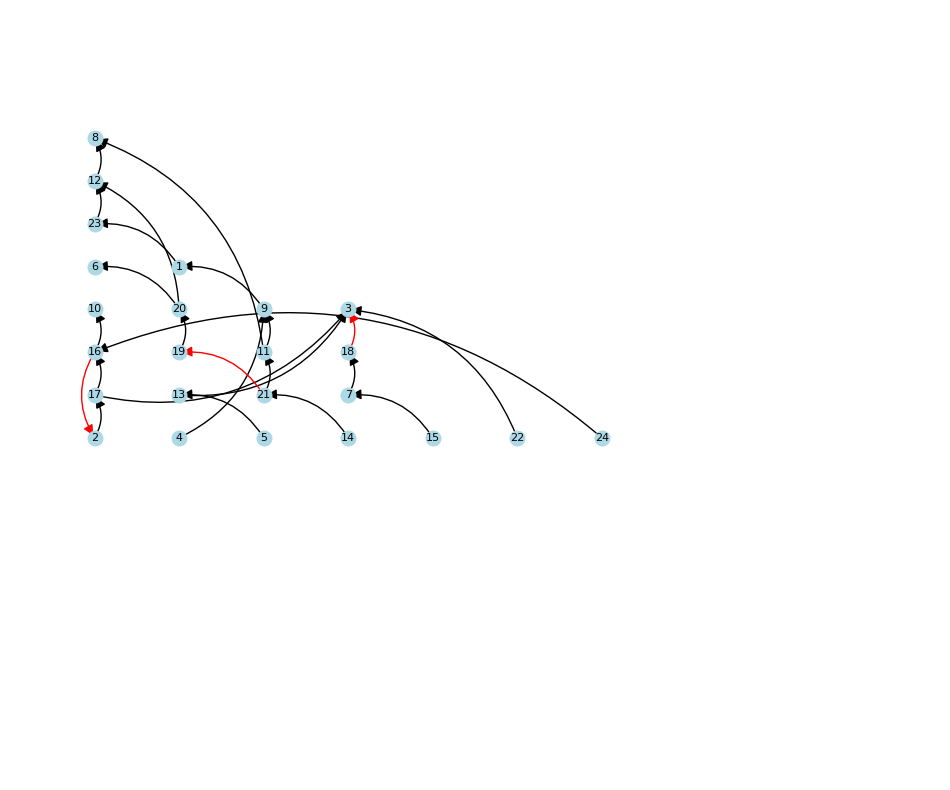

Iteration 4, Direction up: number of crossings: 38


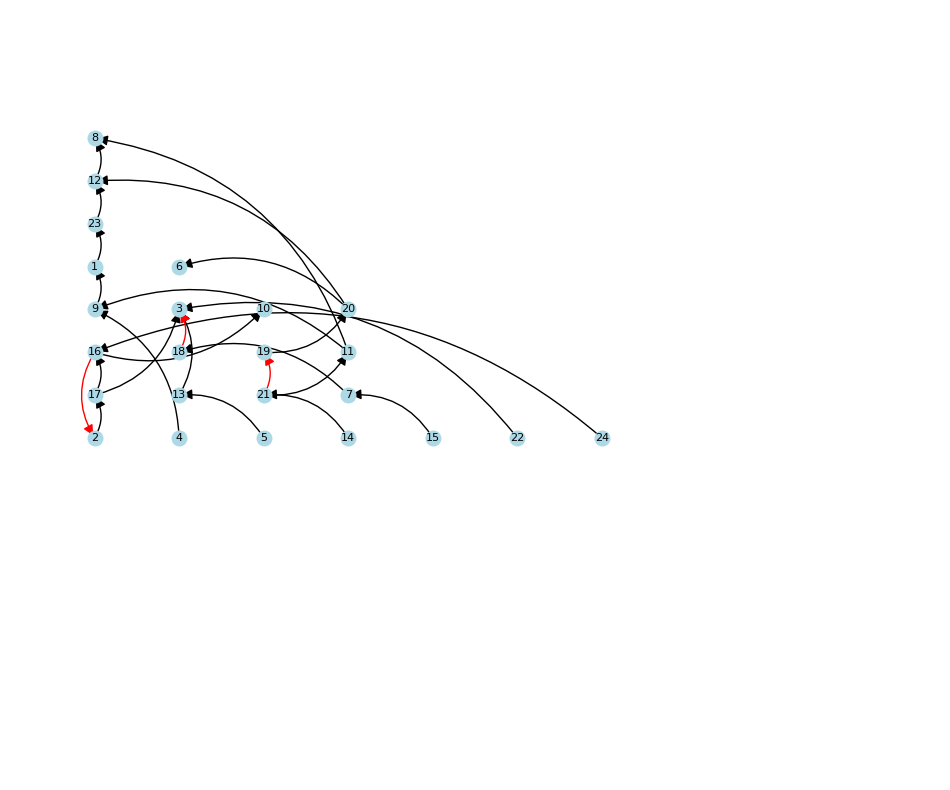

Iteration 5, Direction down: number of crossings: 27


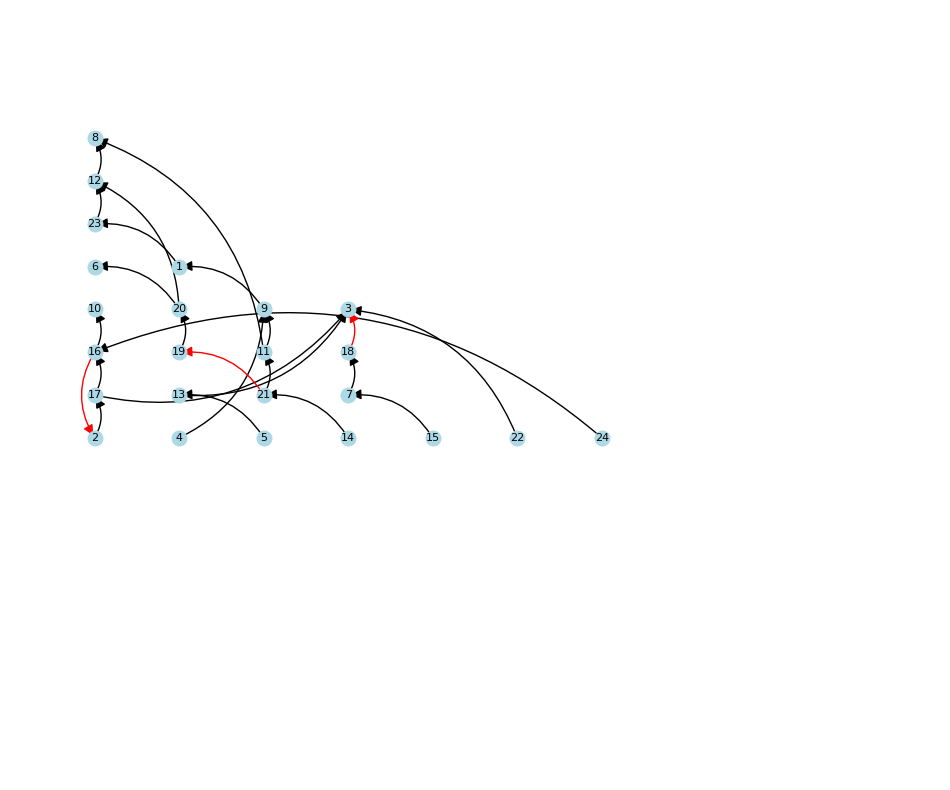

Iteration 5, Direction up: number of crossings: 38


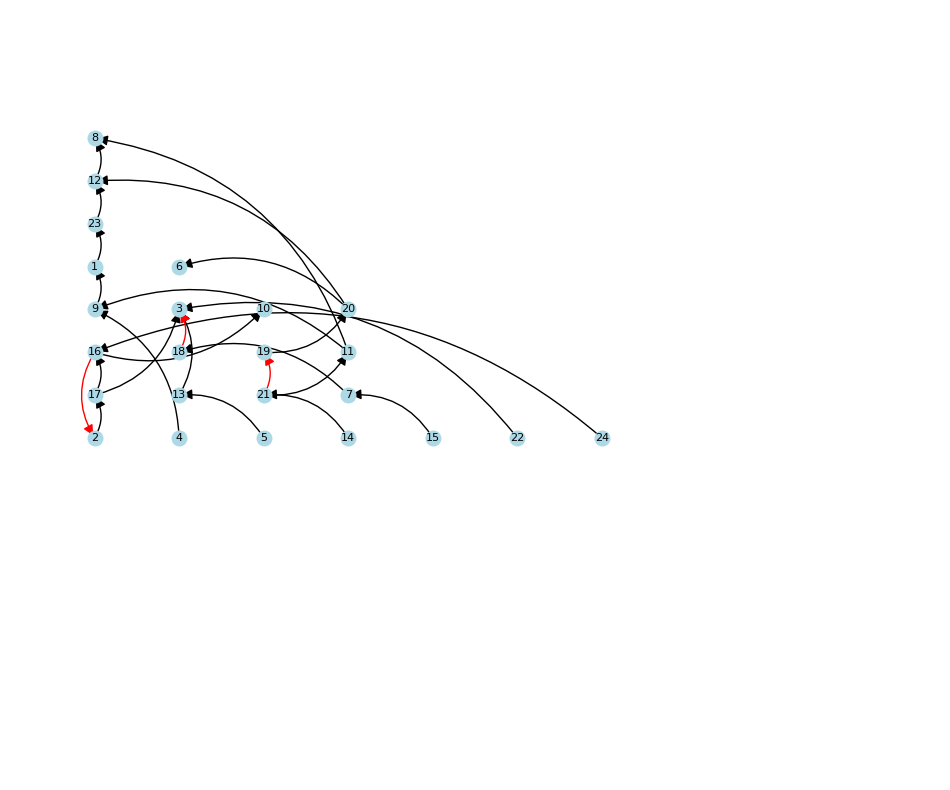

Iteration 6, Direction down: number of crossings: 27


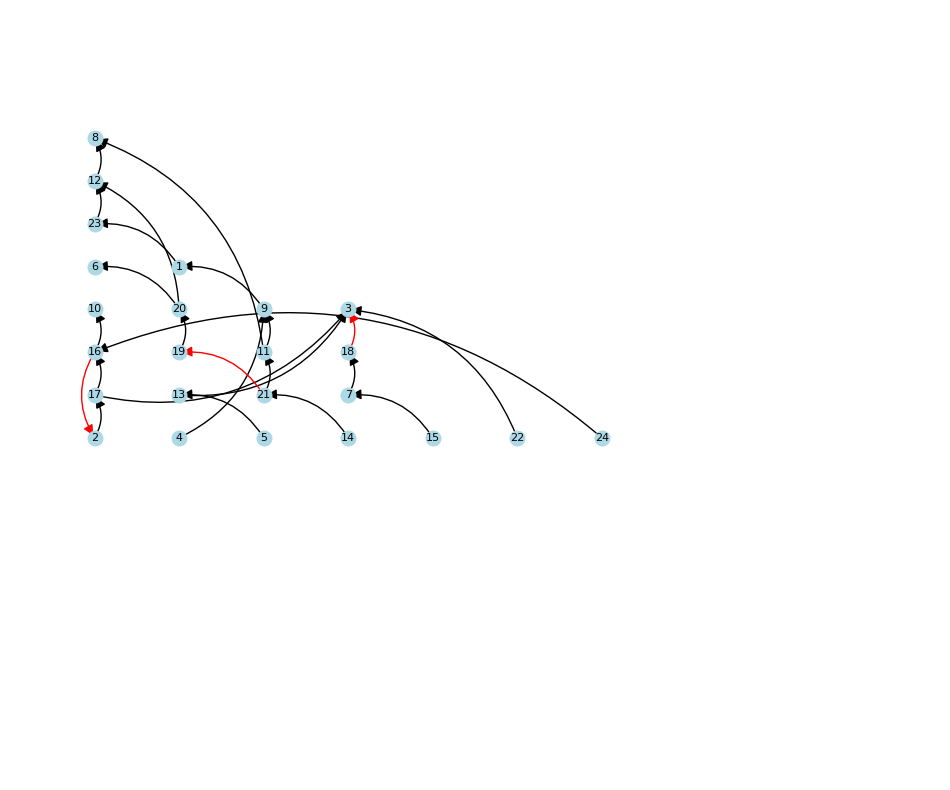

Iteration 6, Direction up: number of crossings: 38


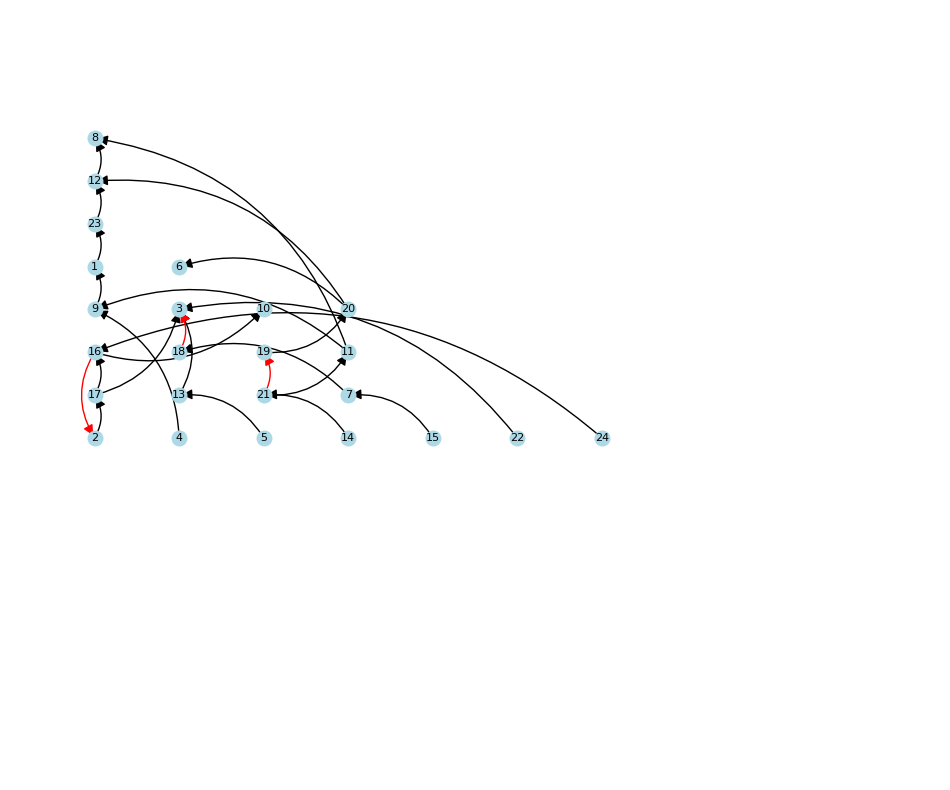

Iteration 7, Direction down: number of crossings: 27


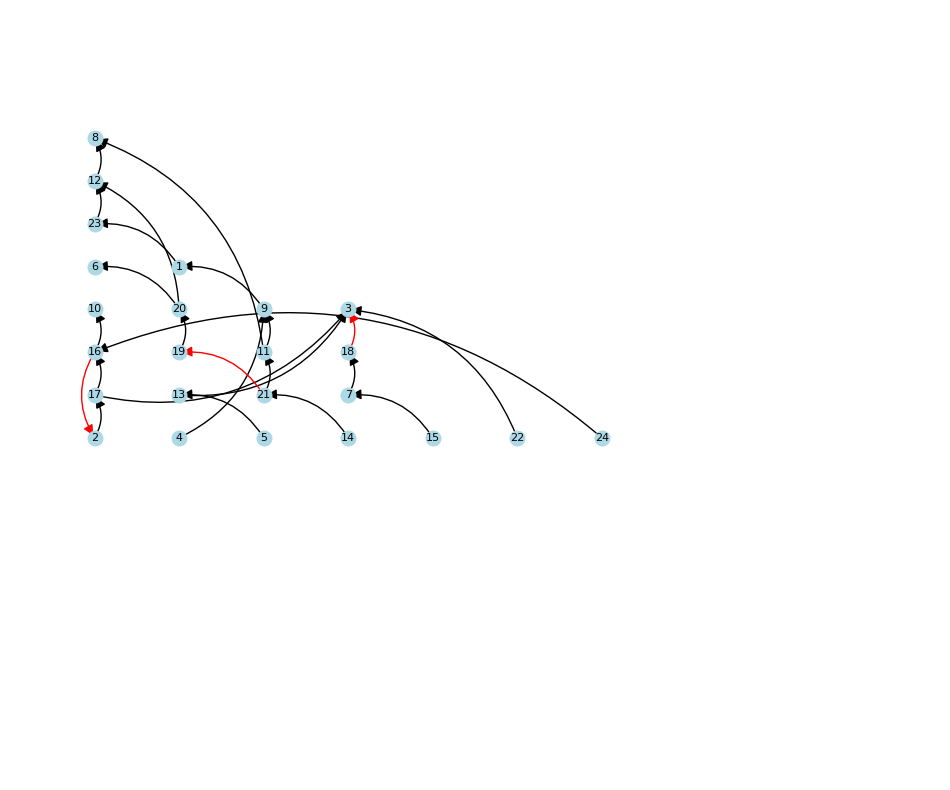

Iteration 7, Direction up: number of crossings: 38


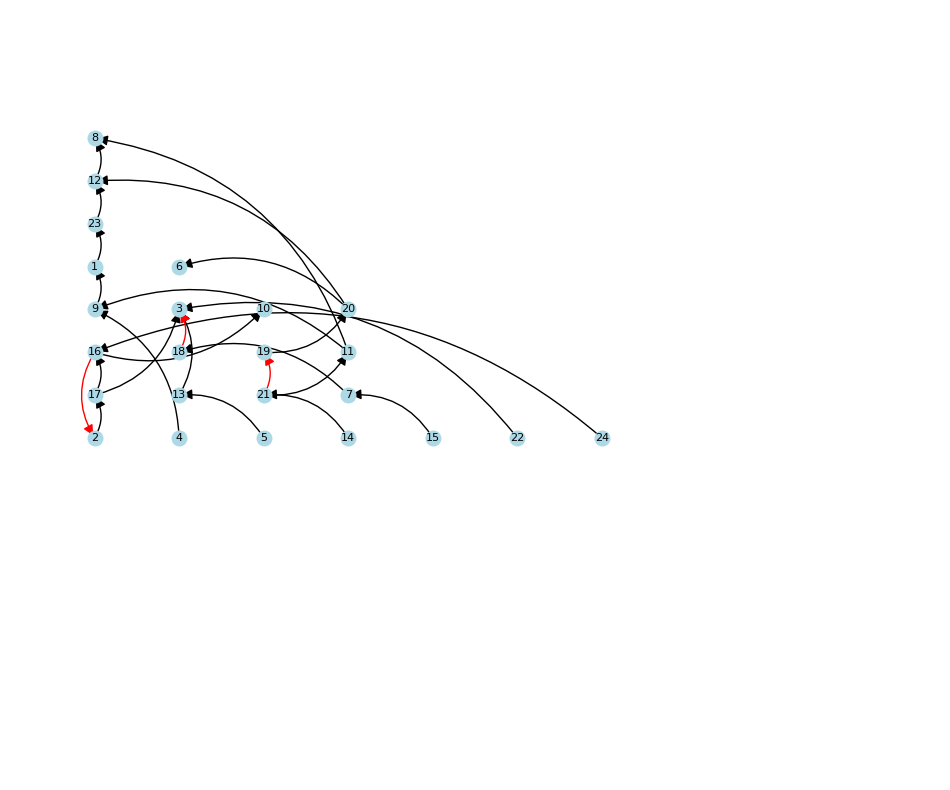

Iteration 8, Direction down: number of crossings: 27


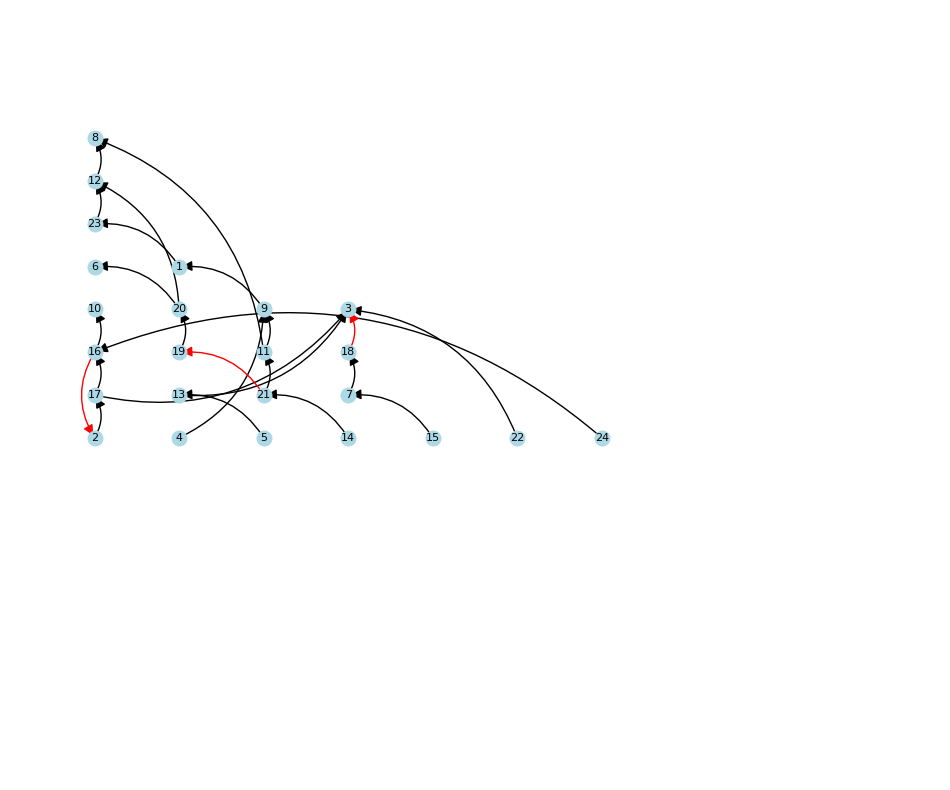

Iteration 8, Direction up: number of crossings: 38


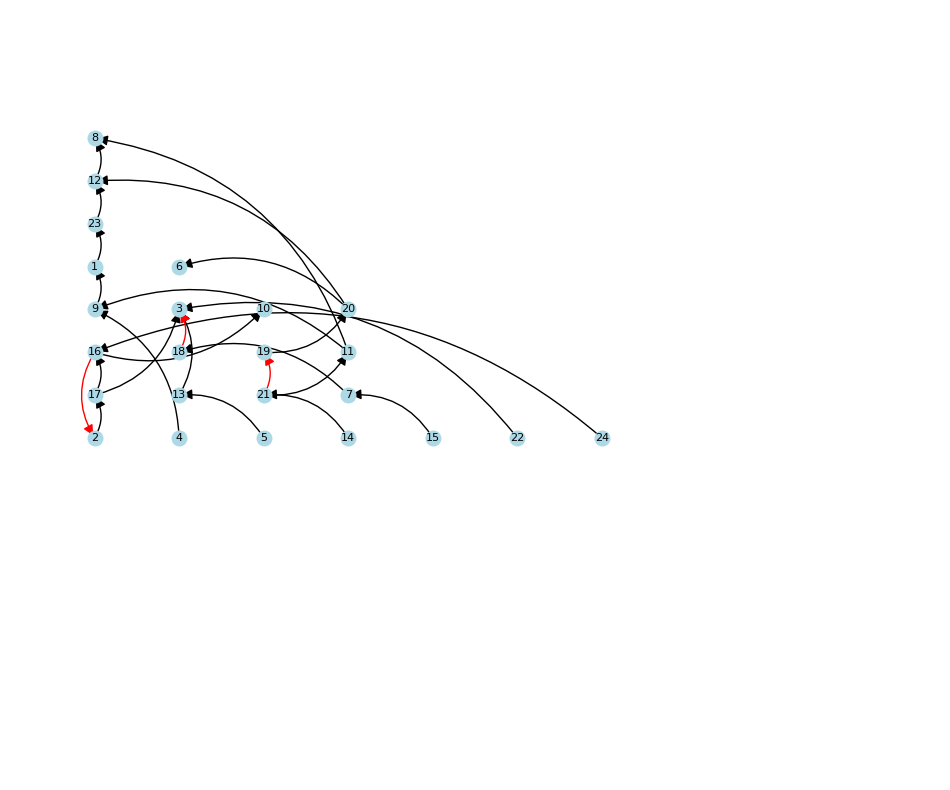

Iteration 9, Direction down: number of crossings: 27


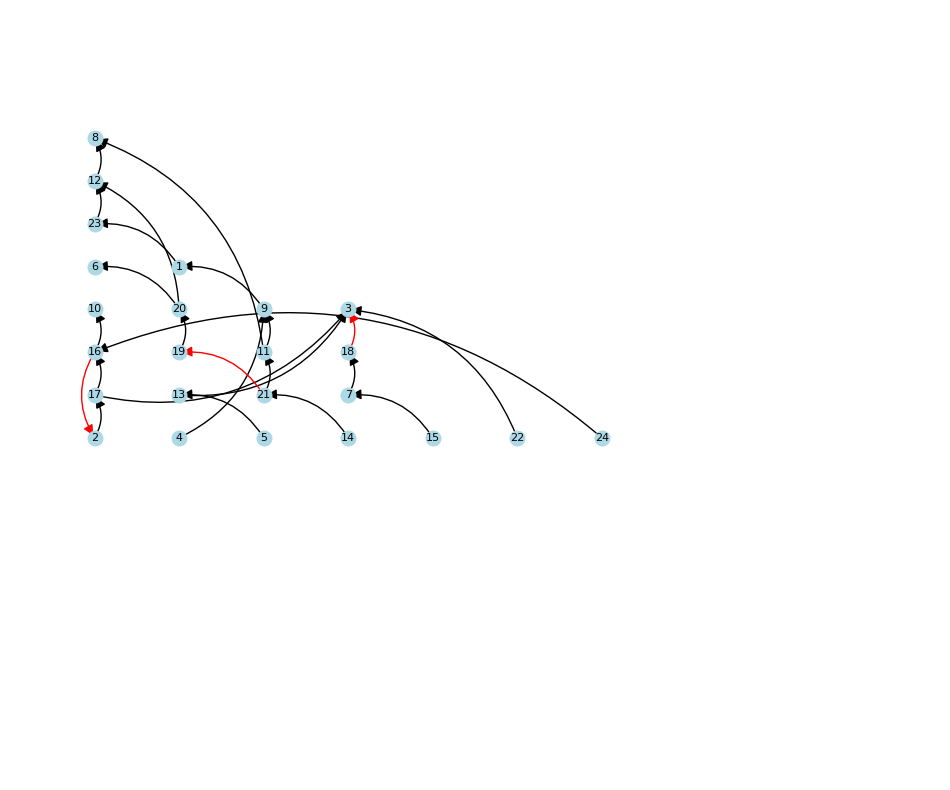

Iteration 9, Direction up: number of crossings: 38


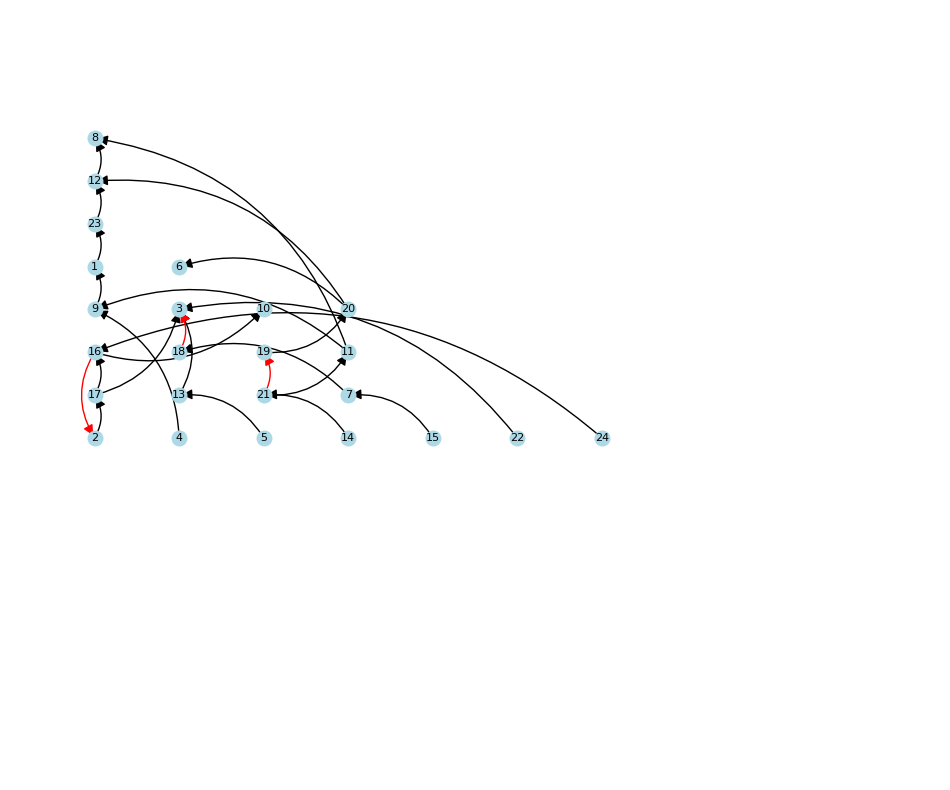

Iteration 10, Direction down: number of crossings: 27


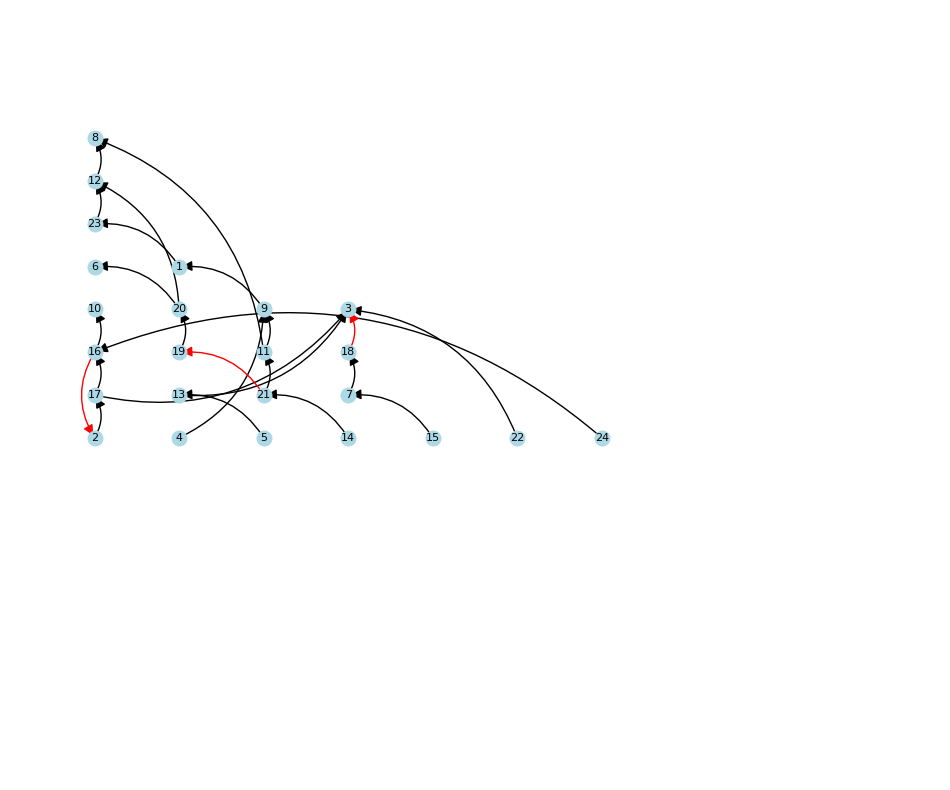

Iteration 10, Direction up: number of crossings: 38


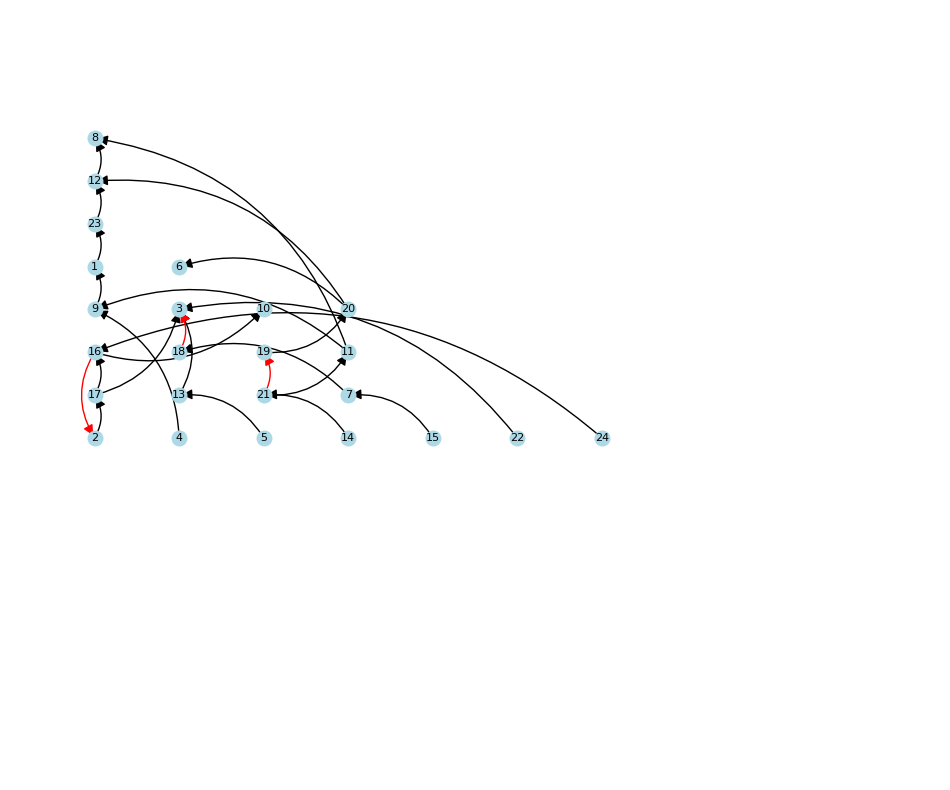

In [23]:
import os
def count_crossings(G, pos):
    crossings = 0
    edges = list(G.edges())
    for i, edge1 in enumerate(edges):
        for edge2 in edges[i+1:]:
            if edges_cross(edge1, edge2, pos):
                crossings += 1
    return crossings


# Helper function to check if edges cross
def edges_cross(edge1, edge2, pos):
    start1, end1 = pos[edge1[0]], pos[edge1[1]]
    start2, end2 = pos[edge2[0]], pos[edge2[1]]
    
    def ccw(A, B, C):
        return (C[1]-A[1]) * (B[0]-A[0]) > (B[1]-A[1]) * (C[0]-A[0])

    return ccw(start1, start2, end2) != ccw(end1, start2, end2) and ccw(start1, end1, start2) != ccw(start1, end1, end2)

def flatten_ordering(final_ordering, layers):
    flat_ordering = {}
    for layer, nodes in final_ordering.items():
        for node, position in nodes.items():
            flat_ordering[node] = (position, -layer)  # Assuming layers go top to bottom
    return flat_ordering

def draw_and_save_graph(G, layers, final_ordering, iteration, direction, num_crossings):
    # Use your existing function to draw the graph
    draw_layered_graph_with_curved_edges(G, layers, final_ordering, fas)
    
    # Save the current figure
    plt.title(f"Iteration {iteration}, {direction}: {num_crossings} crossings")
    filename = f'graph_iteration_{iteration}_{direction}.png'
    plt.savefig(filename)
    plt.close()  # Close the figure to avoid displaying it in the notebook

def iterate_layers_to_minimize_crossings(G, layers, num_iterations=10):
    final_ordering = barycenter_heuristic(G, layers)
    
    # Ensure the directory for the images exists
    os.makedirs('iterations', exist_ok=True)

    # Draw the initial graph and count initial crossings
    initial_flat_ordering = flatten_ordering(final_ordering, layers)
    initial_crossings = count_crossings(G, initial_flat_ordering)
    print(f"Initial number of crossings: {initial_crossings}")
    draw_and_save_graph(G, layers, final_ordering, 0, 'initial', initial_crossings)
    
    for iteration in range(num_iterations):
        for direction in ('down', 'up'):
            # Compute the layer range based on the direction
            layer_range = range(1, max(layers.keys()) + 1) if direction == 'down' else range(max(layers.keys()) - 1, 0, -1)
            
            for layer in layer_range:
                adjacent_layer = layer - 1 if direction == 'down' else layer + 1
                barycenters = {
                    v: calculate_barycenter(v, final_ordering[adjacent_layer], G) 
                    for v in layers[layer]
                }
                barycenters_with_gaps = introduce_tiny_gaps(barycenters)
                sorted_nodes_by_barycenter = sorted(
                    barycenters_with_gaps.items(), key=lambda x: x[1]
                )
                final_ordering[layer] = {
                    node: i for i, (node, _) in enumerate(sorted_nodes_by_barycenter)
                }
            
            # After updating for one direction, count crossings and print
            current_flat_ordering = flatten_ordering(final_ordering, layers)
            current_crossings = count_crossings(G, current_flat_ordering)
            print(f"Iteration {iteration+1}, Direction {direction}: number of crossings: {current_crossings}")

            # Draw and save the graph at the end of each full iteration
            draw_and_save_graph(G, layers, final_ordering, iteration, direction, current_crossings)
            
        
    return final_ordering

# Run the iterative crossing minimization process
final_ordering = iterate_layers_to_minimize_crossings(G_dag, layers)

In [24]:
import os
from PIL import Image, ImageDraw, ImageOps

# Function to generate captions based on the file names
def generate_caption(filename, direction, crossings):
    iteration = int(os.path.splitext(os.path.basename(filename))[0])
    return f"Iteration {iteration}, {direction.capitalize()}: {crossings} crossings"

# Function to collect images and generate captions
def collect_images_with_captions(iteration_dir, num_iterations=10):
    images_info = []
    for iteration in range(1, num_iterations + 1):
        for direction, crossings in [('down', 27), ('up', 38)]:
            img_filename = f'{iteration_dir}/{iteration if direction == "down" else iteration+1}.png'
            if os.path.exists(img_filename):
                caption = generate_caption(img_filename, direction, crossings)
                images_info.append((img_filename, caption))
            else:
                print(f"Missing image file for iteration {iteration} direction {direction}")
    return images_info

# Function to create the table of images with captions
def create_table_of_images_with_captions(images_info, num_iterations=10):
    if not images_info:
        print("No images to process.")
        return

    first_image = Image.open(images_info[0][0])
    image_width, image_height = first_image.size
    border_size = 10  # Border size
    caption_height = 30  # Space for caption
    num_rows = 2
    num_columns = num_iterations
    
    canvas_width = image_width * num_columns
    canvas_height = (image_height + border_size * 2 + caption_height) * num_rows

    canvas = Image.new('RGB', (canvas_width, canvas_height), 'white')
    draw = ImageDraw.Draw(canvas)

    for index, (image_path, caption) in enumerate(images_info):
        row = index // (num_columns * 2)
        col = index % num_columns if row == 0 else (index - num_columns) % num_columns
        img_x = col * image_width
        img_y = row * (image_height + border_size * 2 + caption_height)

        image = Image.open(image_path)
        bordered_image = ImageOps.expand(image, border=border_size, fill='black')
        canvas.paste(bordered_image, (img_x, img_y))

        text_position = (img_x + border_size, img_y + image_height + border_size * 2)
        draw.text(text_position, caption, fill='black', anchor='ms')

    output_path = 'table_of_images_with_captions.png'
    canvas.save(output_path)
    canvas.show()

    return output_path

iteration_dir = 'my_image'  # Your directory with images
images_info = collect_images_with_captions(iteration_dir, num_iterations=10)
if images_info:
    table_image_path = create_table_of_images_with_captions(images_info, num_iterations=10)
    print(f"Table of images created at {table_image_path}")
else:
    print("No images were collected to create the table.")

Table of images created at table_of_images_with_captions.png


In [63]:
def iterate_layers_to_minimize_crossings_median(G, layers, num_iterations=10):
    final_ordering = median_heuristic(G, layers)  # Start with median heuristic instead of barycenter
    
    for iteration in range(num_iterations):
        for direction in ('up', 'down'):
            if direction == 'down':
                layer_range = range(1, max(layers.keys()) + 1)
            else:
                layer_range = range(max(layers.keys()) - 1, 0, -1)
            
            for layer in layer_range:
                adjacent_layer = layer - 1 if direction == 'down' else layer + 1
                medians = {
                    v: calculate_median(v, final_ordering[adjacent_layer], G)
                    for v in layers[layer]
                }
                medians_with_gaps = introduce_tiny_gaps(medians)
                sorted_nodes_by_median = sorted(
                    medians_with_gaps.items(), key=lambda x: x[1]
                )
                final_ordering[layer] = {
                    node: i for i, (node, _) in enumerate(sorted_nodes_by_median)
                }
                
    return final_ordering

final_ord = iterate_layers_to_minimize_crossings_median(G_dag, layers)
print(final_ord)

{0: {2: 0, 4: 1, 5: 2, 14: 3, 15: 4, 22: 5, 24: 6}, 1: {17: 0, 13: 1, 21: 2, 7: 3}, 2: {16: 0, 19: 1, 11: 2, 18: 3}, 3: {10: 0, 20: 1, 9: 2, 3: 3}, 4: {6: 0, 1: 1}, 5: {23: 0}, 6: {12: 0}, 7: {8: 0}}
